In [143]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [118]:
nx = 5
ny = 7

In [119]:
f_kli = np.zeros((nx, ny, 9))
f_kli[:, :, 0] = 1
f_kli[2, 3, 1] = 5

In [157]:
f_kli.sum(axis=2)

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 6., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [152]:
f_ikl = np.zeros((9, nx, ny))
f_ikl[0, :, :] = 1
f_ikl[1, 2, 3] = 5

In [154]:
f_ikl.sum(axis=0)

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 6., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [122]:
f_kli

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 5., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.,

In [123]:
f_kli[2, 3]

array([1., 5., 0., 0., 0., 0., 0., 0., 0.])

In [124]:
def density(occupation_numbers_kli):
    return occupation_numbers_kli.sum(axis=2)

In [125]:
density_kl = density(f_kli)

In [156]:
c_ic.sum()

0

In [144]:
density_kl

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 6., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

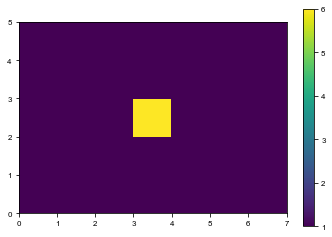

In [147]:
plt.subplot(111, aspect=1)
plt.pcolormesh(density_kl)
plt.colorbar()

In [128]:
# i - velocity index (0..9), c = Cartesian direction (0, 1)
c_ic = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 1], [-1, 1], [-1, -1], [1, -1]])

In [129]:
c_ic

array([[ 0,  0],
       [ 1,  0],
       [ 0,  1],
       [-1,  0],
       [ 0, -1],
       [ 1,  1],
       [-1,  1],
       [-1, -1],
       [ 1, -1]])

In [130]:
velocity_klc = c_ic, density_kl, f_kli

In [131]:
f_i = f_kli[2, 3]
f_i

array([1., 5., 0., 0., 0., 0., 0., 0., 0.])

In [132]:
f_i[0] * c_ic[0] + f_i[1] * c_ic[1] + f_i[2] * c_ic[2] + f_i[3] * c_ic[3] + f_i[4] * c_ic[4] + f_i[5] * c_ic[5] + f_i[6] * c_ic[6] + f_i[7] * c_ic[7] + f_i[8] * c_ic[8]

array([5., 0.])

In [133]:
(f_i * c_ic.T).T

array([[ 0.,  0.],
       [ 5.,  0.],
       [ 0.,  0.],
       [-0.,  0.],
       [ 0., -0.],
       [ 0.,  0.],
       [-0.,  0.],
       [-0., -0.],
       [ 0., -0.]])

In [134]:
(f_i * c_ic.T).T.sum(axis=0)

array([5., 0.])

In [135]:
c_ic.T.shape

(2, 9)

In [136]:
velocity_kl = np.einsum('kli,ic->klc', f_kli, c_ic)

In [137]:
# This computes the streaming velocity
def velocity(occupation_numbers_kli):
    return (np.dot(occupation_numbers_kli, c_ic).T / density(occupation_numbers_kli).T).T

In [138]:
velocity_kl = velocity(f_kli)

In [141]:
velocity_kl[:, :, 0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.83333333, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [142]:
velocity_kl[:, :, 1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])